In [144]:
import networkx as nx
import pandas as pd
import collections
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from networkx.algorithms.community import k_clique_communities
from networkx.utils.decorators import not_implemented_for



In [238]:
data_column = ['node_1', 'node_2' ,'e_weight']
data = pd.read_csv('/Users/NarayanPDPok/Documents/University of Turku/Introduction to data science/Mini Project 2/CE-LC.txt', delim_whitespace=True, names= data_column, skipinitialspace=True)
data

,node_1,node_2,e_weight
0,AC3.3,AC3.4,2.945855
1,AC3.3,C03A7.14,2.895269
2,AC3.3,C05D2.1,2.390948
3,AC3.3,C37C3.6,2.945855
4,AC3.3,Y39B6A.1,2.852143
5,AC3.3,Y39B6A.2,2.811549
6,AC3.3,ZK1067.7,2.811549
7,AC7.2,ZK792.6,2.985783
8,AH6.5,F53G12.5,2.822789
9,AH6.5,F59B2.6,2.908590


In [239]:
len(data)


1648

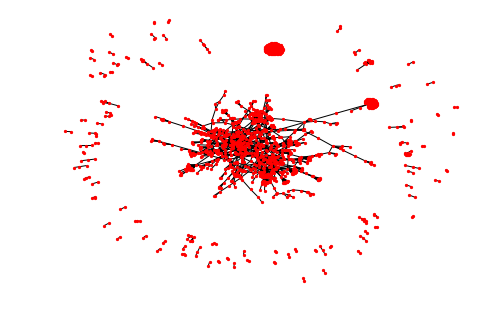

In [240]:
# adding pandas dataframe to the networkx graph 
G = nx.Graph()
G = nx.from_pandas_edgelist(df=data, source='node_1', target='node_2',edge_attr='e_weight')
nx.draw(G, node_size=5, node_color='red')

In [241]:
# number of nodes, number of edges and average degree. 
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 1387\nNumber of edges: 1648\nAverage degree:   2.3764'

In [242]:
#number of nodes
G.number_of_nodes()

1387

In [243]:
#number of edges
G.number_of_edges()

1648

In [244]:
#What is the density of the network
nx.density(G)

0.001714539566017576

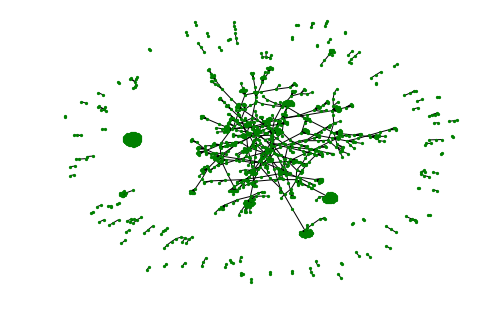

In [245]:
# minimum spanning tree
T=nx.minimum_spanning_tree(G)
nx.draw(T, node_size=5, node_color='green')

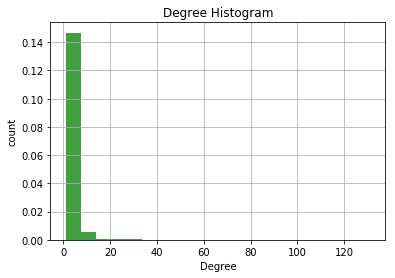

In [246]:
# calculating the degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  
# printing Degree sequence
# print(degree_sequence)

# drawing histogram 
plt.hist(degree_sequence, 20, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Degree')
plt.ylabel('count')
plt.title('Degree Histogram')
plt.grid(True)
plt.show()

In [247]:
# list of largest connected components 
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]


[993,
 132,
 14,
 12,
 10,
 8,
 7,
 6,
 6,
 6,
 6,
 5,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

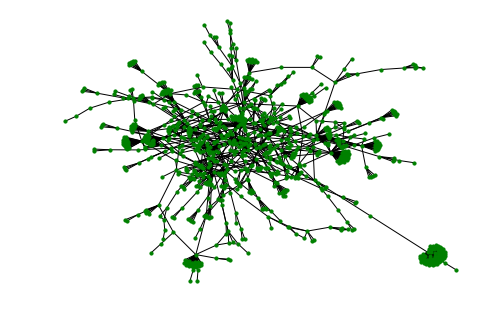

In [248]:
# largest connected network
giant = max(nx.connected_component_subgraphs(G), key=len)
nx.draw(giant, node_size=10, node_color='green')

In [249]:
#diameter of the LC
nx.diameter(giant)

22

In [250]:
# center of LC
nx.center(giant)

['C37A5.9', 'C54D1.6']

In [251]:
#number of clique communities with 3 nodes
c = list(k_clique_communities(giant, 3)) # this gives the list of number of clique communities with 3 nodes
len(c)

44

What is the name of the protein that changing its status has potentially the biggest effect on the rest of the network?

In [252]:
# the protein which has highest degree centrality. Which means this is connected to the most protein in the network.
#changing of this protion has beggest effect on the network.
degree_cen = nx.degree_centrality(G)
ordered_degree = sorted(degree_cen, key = degree_cen.get,reverse = True) 
print(ordered_degree[0])


T08G11.5
